In [2]:
import os
DATADIR = "/data/datasets/cars_wagonr_swift/"
image_files = []

for root, dirs, files in os.walk(DATADIR):
    for name in filter(lambda x: x.endswith('jpg'), files):
        path_list = root.split('/')
        label = path_list[-1]
        split_set = path_list[-2]
        image_files.append((split_set, label, name, root))

In [3]:
import pandas as pd
image_df = pd.DataFrame(image_files, columns =['split_set', 'label', 'name', 'path'])

In [4]:
image_df.label.value_counts()

wagonr    2000
swift     2000
Name: label, dtype: int64

In [5]:
image_df.split_set.value_counts()

train         2400
test           800
validation     800
Name: split_set, dtype: int64

In [23]:
img_distribution = image_df.groupby(['split_set', 'label'])['name'].count()
img_distribution

split_set   label 
test        swift      400
            wagonr     400
train       swift     1200
            wagonr    1200
validation  swift      400
            wagonr     400
Name: name, dtype: int64

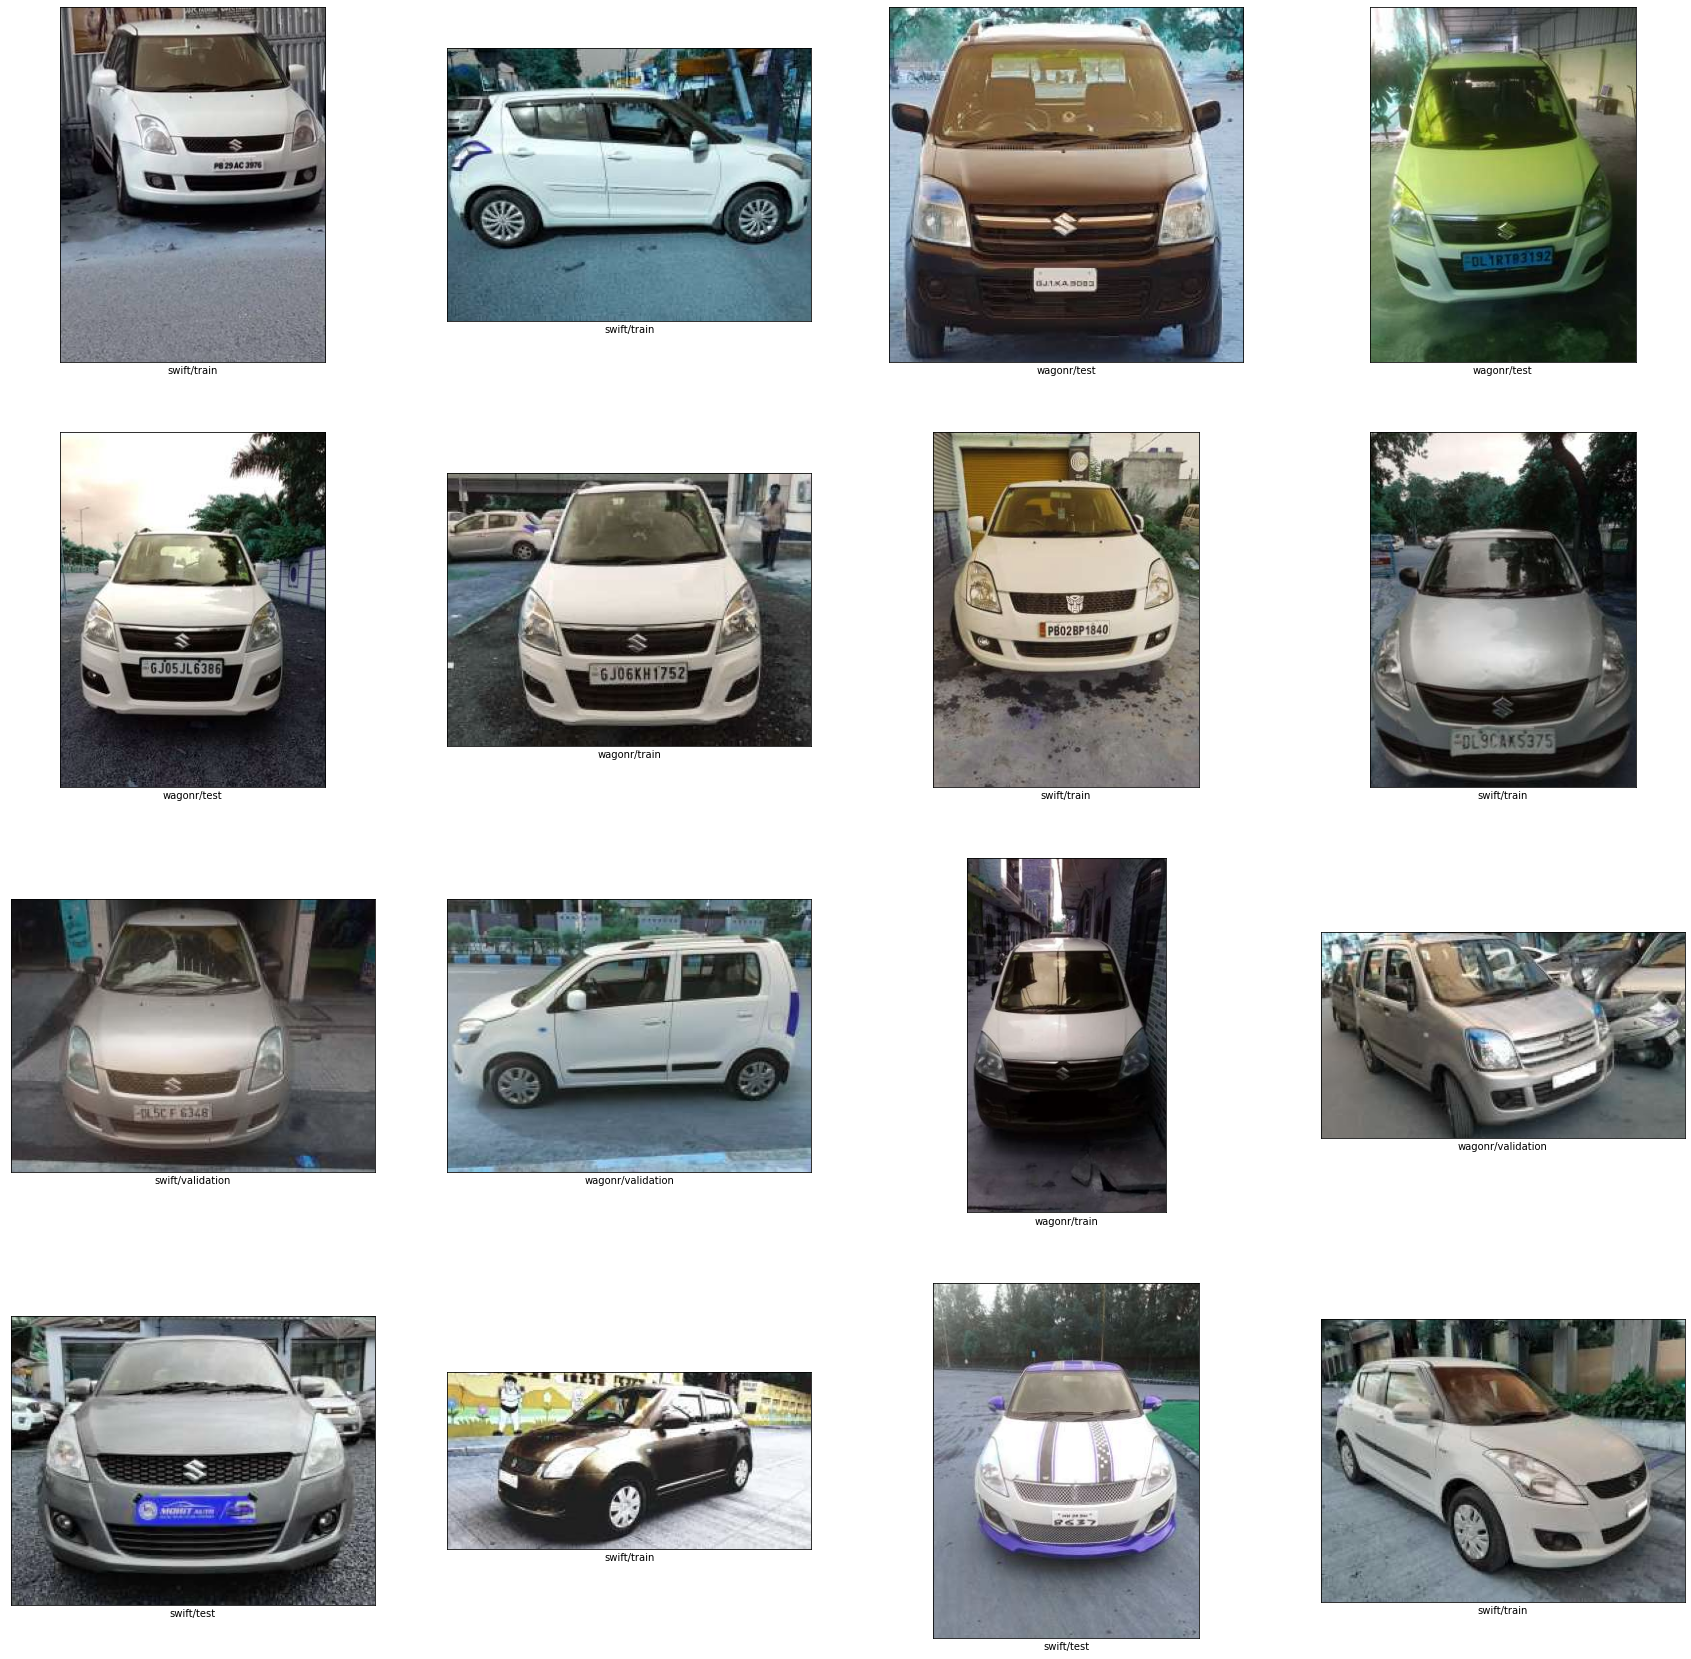

In [24]:
import cv2
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(30,30),ncols=4, nrows=4)
for ax in axs.flat:
    ax.set(xticks=[], yticks=[])
i = 0
for _,row in image_df.sample(16).iterrows():
    img_path = os.path.join(row['path'], row['name'])
    img = cv2.imread(img_path)
    axs[i%4,i//4].imshow(img)
    axs[i%4,i//4].set(xlabel=row['label'] + '/' + row['split_set'])
    i += 1
plt.show()

